/https://web.njit.edu/~sengupta/met%20301/cyclic_loading%20indefinite.pdf

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [41]:
df_fatigue = pd.read_csv(".\\data\\fatigue.csv")
df_fatigue.head()

,N,S
0,1000,81000
1,2000,75465
2,4000,70307
3,8000,65501
4,16000,61024


          N      S  Fatigue Life    Stress
0      1000  81000      3.000000  4.908485
1      2000  75465      3.301030  4.877746
2      4000  70307      3.602060  4.846999
3      8000  65501      3.903090  4.816248
4     16000  61024      4.204120  4.785501
5     32000  56853      4.505150  4.754753
6     64000  52967      4.806180  4.724005
7     96000  50818      4.982271  4.706018
8    144000  48757      5.158362  4.688037
9    216000  46779      5.334454  4.670051
10   324000  44881      5.510545  4.652063
11   486000  43060      5.686636  4.634074
12   729000  41313      5.862728  4.616087
13  1000000  40000      6.000000  4.602060


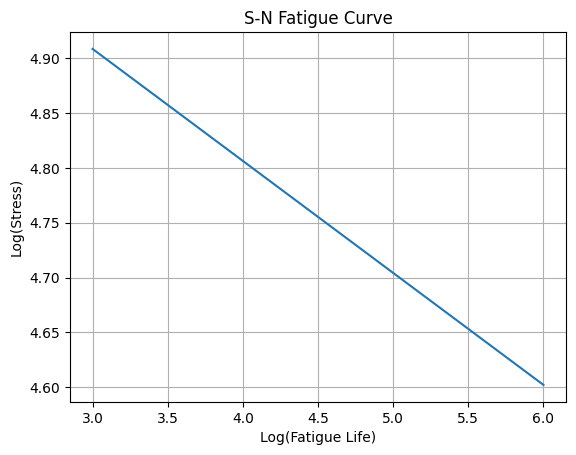

In [42]:
# Perform S-N curve calculations
df_fatigue['Fatigue Life'] = np.log10(df_fatigue['N'])
df_fatigue['Stress'] = np.log10(df_fatigue['S'])

# Print the updated DataFrame
print(df_fatigue)

# Plotting the S-N curve
plt.plot(df_fatigue['Fatigue Life'], df_fatigue['Stress'])
plt.xlabel('Log(Fatigue Life)')
plt.ylabel('Log(Stress)')
plt.title('S-N Fatigue Curve')
plt.grid(True)
plt.show()


C:\Users\tohid\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


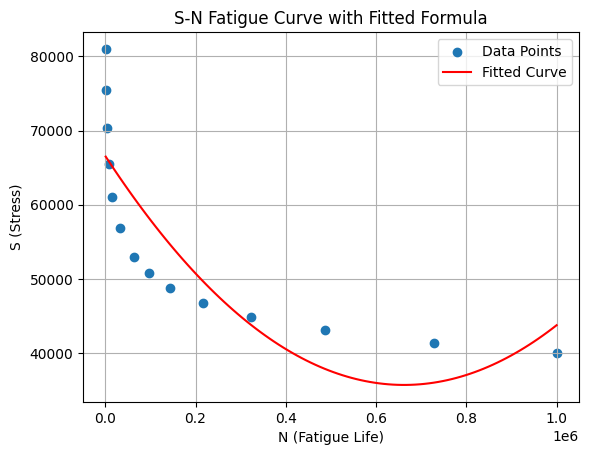

In [43]:
# Perform polynomial regression
degree = 2  # Set the degree of the polynomial
X = df_fatigue[['N']]
y = df_fatigue['S']
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Predict stress values using the fitted formula
X_pred = np.linspace(df_fatigue['N'].min(), df_fatigue['N'].max(), 100).reshape(-1, 1)
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# Plotting the S-N curve with the fitted formula
plt.scatter(df_fatigue['N'], df_fatigue['S'], label='Data Points')
plt.plot(X_pred, y_pred, color='red', label='Fitted Curve')
plt.xlabel('N (Fatigue Life)')
plt.ylabel('S (Stress)')
plt.title('S-N Fatigue Curve with Fitted Formula')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\tohid\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error: 89571383.42666666


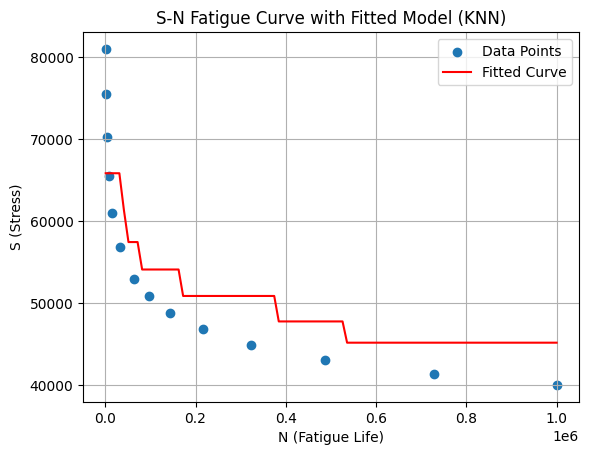

In [44]:
# Split the data into training and testing sets
X = df_fatigue[['N']]
y = df_fatigue['S']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the KNN model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Predict stress values
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting the S-N curve with the fitted model
X_pred = np.linspace(df_fatigue['N'].min(), df_fatigue['N'].max(), 100).reshape(-1, 1)
y_pred_curve = model.predict(X_pred)

plt.scatter(df_fatigue['N'], df_fatigue['S'], label='Data Points')
plt.plot(X_pred, y_pred_curve, color='red', label='Fitted Curve')
plt.xlabel('N (Fatigue Life)')
plt.ylabel('S (Stress)')
plt.title('S-N Fatigue Curve with Fitted Model (KNN)')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 12621671.044545492


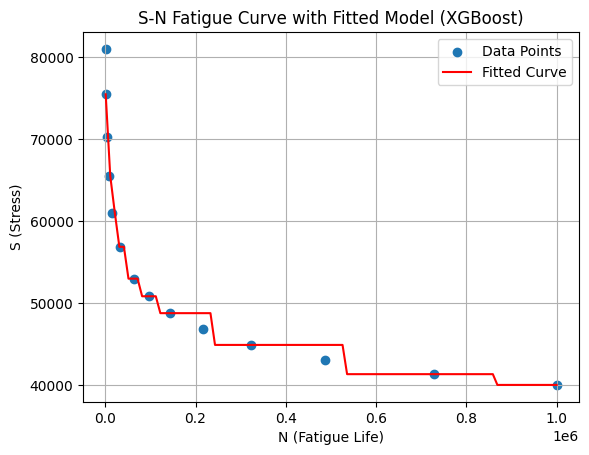

In [45]:
# Split the data into training and testing sets
X = df_fatigue[['N']]
y = df_fatigue['S']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the XGBoost model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict stress values
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting the S-N curve with the fitted model
X_pred = np.linspace(df_fatigue['N'].min(), df_fatigue['N'].max(), 100).reshape(-1, 1)
y_pred_curve = model.predict(X_pred)

plt.scatter(df_fatigue['N'], df_fatigue['S'], label='Data Points')
plt.plot(X_pred, y_pred_curve, color='red', label='Fitted Curve')
plt.xlabel('N (Fatigue Life)')
plt.ylabel('S (Stress)')
plt.title('S-N Fatigue Curve with Fitted Model (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 24244216.227533367


C:\Users\tohid\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


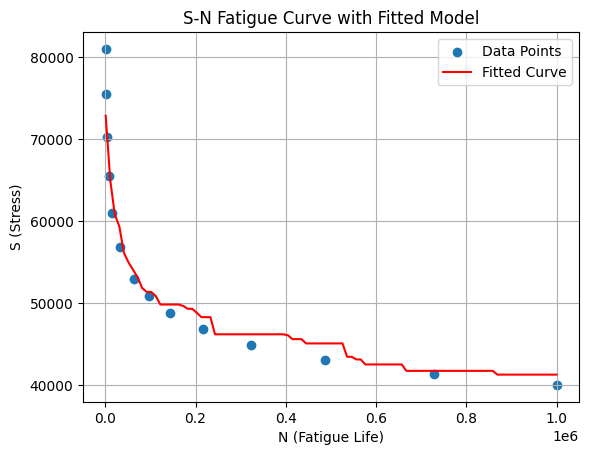

In [46]:
# Split the data into training and testing sets
X = df_fatigue[['N']]
y = df_fatigue['S']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict stress values
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting the S-N curve with the fitted model
X_pred = np.linspace(df_fatigue['N'].min(), df_fatigue['N'].max(), 100).reshape(-1, 1)
y_pred_curve = model.predict(X_pred)

plt.scatter(df_fatigue['N'], df_fatigue['S'], label='Data Points')
plt.plot(X_pred, y_pred_curve, color='red', label='Fitted Curve')
plt.xlabel('N (Fatigue Life)')
plt.ylabel('S (Stress)')
plt.title('S-N Fatigue Curve with Fitted Model')
plt.legend()
plt.grid(True)
plt.show()


An automobile engine part rotates, and in each rotation stress varies from Smax=20,000 psi to Smin=1,000 psi. The material has Su= 80,000 psi, Syp = 60,000 psi, Se=28,000 psi. Assume K=Kf=1. Find Nfs, with (i) Soderberg’s, (ii) Goodman’s and (iii) modified Goodman’s equations.

In [47]:
Smax = 20000  # Maximum stress (psi)
Smin = 1000  # Minimum stress (psi)
Su = 80000  # Ultimate stress (psi)
Syp = 60000  # Yield stress (psi)
Se = 28000  # Endurance limit stress (psi)
Kf = 1  # Stress concentration factor

# Calculate steady stress and reversing stress
Savg = (Smax + Smin) / 2  # Steady stress (psi)
Sr = (Smax - Smin) / 2  # Reversing stress (psi)

# Calculate Nfs using Soderberg's equation
Nfs = Syp / (Savg + Sr * Kf * (Syp / Se))

# Print the calculated fatigue life
print("Fatigue Life using Soderberg's equation (Nfs):", round(Nfs,2))

# Calculate Nfs using Goodman's equation
Nfs = Su / (Savg + Sr * Kf * (Su / Se))

# Print the calculated fatigue life
print("Fatigue Life using Goodman's equation(Nfs):", round(Nfs,2))

# Calculate Nfs using Modified Goodman's equation
Nfs1 = Su / (Savg + Sr * Kf * (Su / Se))
Nfs2 = Syp / (Savg + Sr * Kf)

# Compare Nfs1 and Nfs2
Nfs = min(Nfs1, Nfs2)

# Print the calculated fatigue life
print("Fatigue Life using Modified Goodman's equation(Nfs):", round(Nfs,2))

Fatigue Life using Soderberg's equation (Nfs): 1.94
Fatigue Life using Goodman's equation(Nfs): 2.13
Fatigue Life using Modified Goodman's equation(Nfs): 2.13


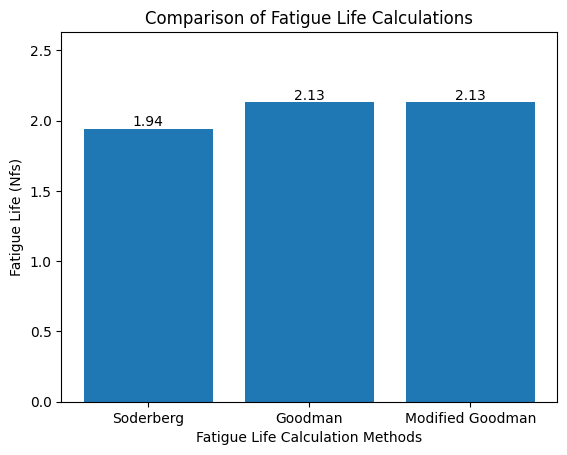

In [48]:
# Fatigue Life values
Nfs_soderberg = 1.94
Nfs_goodman = 2.13
Nfs_modified_goodman = 2.13

# Create a bar plot
methods = ['Soderberg', 'Goodman', 'Modified Goodman']
fatigue_lifes = [Nfs_soderberg, Nfs_goodman, Nfs_modified_goodman]

plt.bar(methods, fatigue_lifes)
plt.xlabel('Fatigue Life Calculation Methods')
plt.ylabel('Fatigue Life (Nfs)')
plt.title('Comparison of Fatigue Life Calculations')
plt.ylim(0, max(fatigue_lifes) + 0.5)

# Add labels to each bar
for i, v in enumerate(fatigue_lifes):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()
